Otimização Natural  - Lista de exercícios 1 

In [2]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import datetime
from scipy.spatial import Voronoi, voronoi_plot_2d



def plot_points(data_vectors, Y, title, with_voronoi=False, Yvor=None, xlim=(None, None), ylim=(None, None)):
    if with_voronoi:
        if Yvor is None:
            raise('No Yvor was received')
        else:
            vor = Voronoi(Yvor)
            fig = voronoi_plot_2d(vor)
    plt.figure()
    plt.title(title)
    plt.plot(data_vectors[:, 0], data_vectors[:, 1], 'k.', label="X (data vector)")
    plt.plot(Y[:, 0], Y[:, 1], 'r.', markersize=20, label="Y")
    if xlim[0] is not None:
        plt.xlim(xlim)
    if ylim[0] is not None:
        plt.ylim(ylim)
    plt.grid()
    plt.legend()
    plt.show()


def plot_curves(history_J, history_D, history_T, final_i, title):
    history_J = history_J[:final_i]
    history_D = history_D[:final_i]
    history_T = history_T[:final_i]

    plt.figure()
    plt.title(title)
    plt.plot(-history_J, 'r-', label='- Cost function')
    plt.plot(history_D, 'k-', label='Mean Distance')
    plt.plot(history_T, 'b-', label='Temperature')
    plt.legend()
    plt.grid()
    plt.show()


def deterministic_annealing(X, n_centroid, T0, Tmin, max_iterations, alpha, epsilon, delta):
    # convection: X -> np.array((number_of_data_points, dimension))
    dim = X.shape[-1]
    Y = rd.normal(0, 1, size=(n_centroid, dim))
    d_xy = np.zeros((len(Y), len(X)))
    p_yx = np.zeros((len(Y), len(X)))

    # initialize histories
    history_J = np.zeros(max_iterations)
    history_J[0] = np.inf

    history_T = np.zeros(max_iterations)
    history_T[0] = T0

    history_D = np.zeros(max_iterations)
    history_D[0] = np.inf

    history_Y = np.zeros((max_iterations, *Y.shape))
    history_Y[0] = Y

    finished = False
    T = T0
    i = 1

    while not finished:
        # Partition condition
        for i_x in range(len(X)):
            for i_y in range(len(Y)):
                d_xy[i_y, i_x] = np.sum((X[i_x] - Y[i_y])**2)
        
        p_yx = np.exp(-d_xy/T)
        Z_x = np.sum(p_yx, axis=0)
        p_yx = p_yx / Z_x

        # Centroid condition
        for i_y in range(len(Y)):
            Y[i_y] = np.dot(p_yx[i_y], X)/np.sum(p_yx[i_y])

        # Cost Function and history
        history_J[i] = -T/len(X)*np.sum(np.log(Z_x))
        history_D[i] = np.mean(np.sum(p_yx * d_xy, axis=0))
        history_T[i] = T

        # Loop control
        if abs(history_J[i] - history_J[i-1])/abs(history_J[i-1]) < delta:
            T = alpha * T
            Y = Y + epsilon * np.random.normal(0, 1, np.shape(Y))

        history_Y[i] = Y
        i += 1
        if (T < Tmin) or (i == max_iterations):
            finished = True

    return Y, p_yx, i, history_J, history_D, history_T, history_Y

    

01) Prova de 2012 - Questão 4

![q1](img/Q1.png)



/tmp/ipykernel_59920/3394290478.py:87: RuntimeWarning: invalid value encountered in double_scalars
  if abs(history_J[i] - history_J[i-1])/abs(history_J[i-1]) < delta:


 A matriz de probabilidades P_ygivenx obtida foi:
[[1.88535450e-320 1.88535450e-320 0.00000000e+000 1.00000000e+000
  1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 1.00000000e+000 0.00000000e+000
  0.00000000e+000 3.69701085e-150 6.65030037e-046 2.05522885e-254]]
Os pontos centroides ficaram localizados nos pontos: 
[[-1.8000008  -1.80000069]
 [ 4.66666621  4.66666668]]
O algoritmo foi completou a solução em 65 iterações. Com um Jfinal=6.866666666667966 e A distância quadrática média D=6.866666666667966
A figura a seguir apresenta a configruação final do problema. 


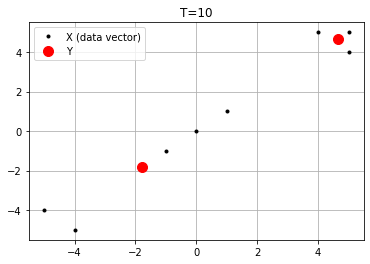

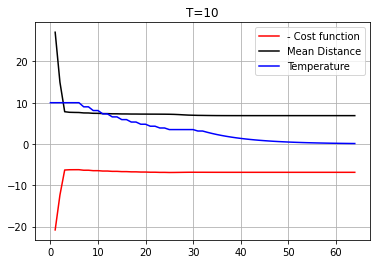

/tmp/ipykernel_59920/3394290478.py:87: RuntimeWarning: invalid value encountered in double_scalars
  if abs(history_J[i] - history_J[i-1])/abs(history_J[i-1]) < delta:


 A matriz de probabilidades P_ygivenx obtida foi:
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.75146663e-20]]
Os pontos centroides ficaram localizados nos pontos: 
[[ 2.3333339   2.33333205]
 [-4.5000001  -4.50000099]]
O algoritmo foi completou a solução em 142 iterações. Com um Jfinal=8.958333333337176 e A distância quadrática média D=8.958333333337176
A figura a seguir apresenta a configruação final do problema. 


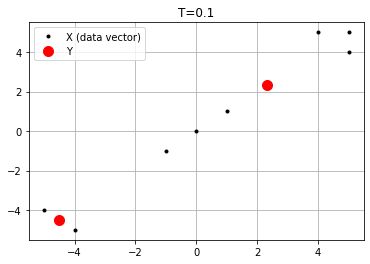

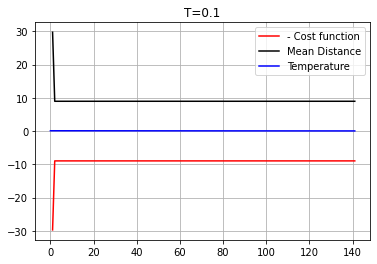

In [2]:
data_vector = np.array([[5, 4], [4, 5], [5, 5], [-5, -4], [-4, -5], [0, 0], [1, 1], [-1, -1]])

np.random.seed(0)
Y10, p_yx10, i10, history_J10, history_D10, history_T10, history_Y10 = \
    deterministic_annealing(X=data_vector, n_centroid=2, T0=10, Tmin=0.1, max_iterations=300,
                            alpha=.9, epsilon=1e-6, delta=1e-3)


print(" A matriz de probabilidades P_ygivenx obtida foi:\n{}".format(p_yx10))
print("Os pontos centroides ficaram localizados nos pontos: \n{}".format(Y10))
print("O algoritmo foi completou a solução em {} iterações. Com um Jfinal={} e A distância quadrática média D={}".format(i10, history_J10[i10-1], history_D10[i10-1]))
print("A figura a seguir apresenta a configruação final do problema. ")
plot_points(data_vector, Y10, "T=10")
plot_curves(history_J10, history_D10, history_T10, i10, "T=10")

### item b ###
Y01, p_yx01, i01, history_J01, history_D01, history_T01, history_Y01 = \
    deterministic_annealing(X=data_vector, n_centroid=2, T0=0.1, Tmin=0.05, max_iterations=300, alpha=.995,
                            epsilon=1e-6, delta=1e-3)


print(" A matriz de probabilidades P_ygivenx obtida foi:\n{}".format(p_yx01))
print("Os pontos centroides ficaram localizados nos pontos: \n{}".format(Y01))
print("O algoritmo foi completou a solução em {} iterações. Com um Jfinal={} e A distância quadrática média D={}".format(i01, history_J01[i01-1], history_D01[i01-1]))
print("A figura a seguir apresenta a configruação final do problema. ")
plot_points(data_vector, Y01, "T=0.1")
plot_curves(history_J01, history_D01, history_T01, i01, "T=0.1")


Temperaturas pouco menores que $T=0.1$ implicam erros numéricos para precisão utilizada, portanto foi necessário reduzir o fator $\alpha$ de maneira que a temperatura se manteve praticamente constante ao longo das iterações. A ausência da etapa de redução de temperatura inibiu o processo de rearranjo que levaria do estado para o ponto de mínimo global apresentado quando o $T_0=10$.

02) Prova de 2017 - Questão 4

![q1](img/Q2.png)


In [22]:
data_vector = np.array(((0, 0), (0, 2), (2, 2), (2, 0)))
d_xy = np.array(((1, 5, 5, 1), (5, 1, 1, 5)))
Y1 = np.zeros((2, 2))


p_yx = np.zeros((len(Y1), len(data_vector)))
T = 5
for i_x in range(len(data_vector)):
    for i_y in range(len(Y1)):
        p_yx[i_y, i_x] = np.exp(-d_xy[i_y, i_x]/T)
                
Z_x = np.sum(p_yx, axis=0)
p_yx = p_yx / Z_x

print("\n### item a ###")
print("p_y|x = \n{}".format(p_yx))

### item b ###
print("\n### item b ###")
# print("Para atualização utiliza-se DA")

# Distância antes da atualização
D1 = np.mean(np.sum(p_yx * d_xy, axis=0))

# Atualização 
Y2 = np.zeros((2,2))
for i_y in range(len(Y2)):
    Y[i_y] = np.dot(p_yx[i_y], data_vector)/np.sum(p_yx[i_y])
    
for i_x in range(len(data_vector)):
    for i_y in range(len(Y2)):
        p_yx[i_y, i_x] = np.exp(-d_xy[i_y, i_x]/T)

Z_x = np.sum(p_yx, axis=0)
p_yx = p_yx / Z_x

# Distância após a atualização
D2 = np.mean(np.sum(p_yx * d_xy, axis=0))

# Y, p_yx, max_i, _, _, _, _ = deterministic_annealing(X=data_vector, n_centroid=2, T0=T, Tmin=0.1, max_iterations=300,
#                                                      alpha=.9, epsilon=1e-6, delta=1e-3)
# d_xy = np.zeros((len(Y), len(data_vector)))
# for i_x in range(len(data_vector)):
#     for i_y in range(len(Y)):
#         d_xy[i_y, i_x] = np.sum((data_vector[i_x] - Y[i_y])**2)
        
print("Distância inicial: \t\t{}\nDistância após atualização: \t{}\nDiferença: \t\t\t{}".format(D1, D2, D2 - D1))
print("Não houve mudança devido a partição já estar em um ponto ótimo")


### item a ###
p_y|x = 
[[0.68997448 0.31002552 0.31002552 0.68997448]
 [0.31002552 0.68997448 0.68997448 0.31002552]]

### item b ###
Distância inicial: 		2.240102075489551
Distância após atualização: 	2.240102075489551
Diferença: 			0.0
Não houve mudança devido a partição já estar em um ponto ótimo


Q3) Proponha uma função J ( x ), sendo x um vetor com 20 dimensões, cujo ponto mínimo você conheça. Evite propor funções que tenham um só ponto mínimo. Encontre o ponto mínimo global utilizando S.A. Entregue o código utilizado e alguns comentários sobre o resultado obtido.


04) Prova de 2009 - Questão 4 (Questão extra, opcional)

![q4a](img/Q4a.png)
![q4b](img/Q4b.png)


In [4]:
print("### item a ###")

data_vector = np.array(((1, 2), (2, 1), (-2, -1), (-1, -2)))
X = data_vector
T = 5
Y0 = np.array(((1, 1), (-1, -1)))
d_xy = np.zeros((len(Y0), len(X)))

for i_x in range(len(X)):
    for i_y in range(len(Y0)):
        d_xy[i_y, i_x] = np.sum((X[i_x] - Y0[i_y]) ** 2)

p_yx = np.exp(-d_xy / T)
Z_x = np.sum(p_yx, axis=0)
p_yx = p_yx / Z_x

print("Matriz p_y|x: \n{}".format(p_yx))

Y1 = np.zeros(Y0.shape)
for i_y in range(len(Y0)):
    Y1[i_y] = np.dot(p_yx[i_y], X) / np.sum(p_yx[i_y])

print("Novo Y calculado: \n{}".format(Y1))

for T in np.lin
    Y0 = np.array(((1, 1), (-1, -1)))
    d_xy = np.zeros((len(Y0), len(X)))

    for i_x in range(len(X)):
        for i_y in range(len(Y0)):
            d_xy[i_y, i_x] = np.sum((X[i_x] - Y0[i_y]) ** 2)

    p_yx = np.exp(-d_xy / T)
    Z_x = np.sum(p_yx, axis=0)
    p_yx = p_yx / Z_x

    Y1 = np.zeros(Y0.shape)
    for i_y in range(len(Y0)):
        Y1[i_y] = np.dot(p_yx[i_y], X) / np.sum(p_yx[i_y])
    
    


### item a ###
Matriz p_y|x: 
[[0.9168273 0.9168273 0.0831727 0.0831727]
 [0.0831727 0.0831727 0.9168273 0.9168273]]
Novo Y calculado: 
[[ 1.25048191  1.25048191]
 [-1.25048191 -1.25048191]]
### item b ###


Após desenvolvimento algebrico apresentado a seguir obtemos que:

$$ d[k+1] = \frac{3}{2} \cdot \tanh{\left(\frac{6\cdot d[k]}{T}\right)}  $$

<center><img src="img/Q4b_sol1.png" width="500"></center>
<center><img src="img/Q4b_sol2.png" width="500"></center>
<center><img src="img/Q4b_sol3.png" width="500"></center>

In [10]:
print("Verficamos que pelo fórmula analítica obtida, nas condições dadas: d[2] = {}".format(3/2*np.tanh(6*1/T)))
print("Enquanto pelo passo calculado pelo algoritmo temos que d[2] = {}".format( Y1[0][0]))
print("Diferença de {:.2} corresponde apenas a erro numérico.".format(3/2*np.tanh(6*1/T) - Y1[0][0]))

Verficamos que pelo fórmula analítica obtida, nas condições dadas: d[2] = 1.2504819105182328
Enquanto o pelo passo calculado pelo algoritmo temos que d[2] = 1.250481910518233
Diferença de -2.2e-16


### item c ###


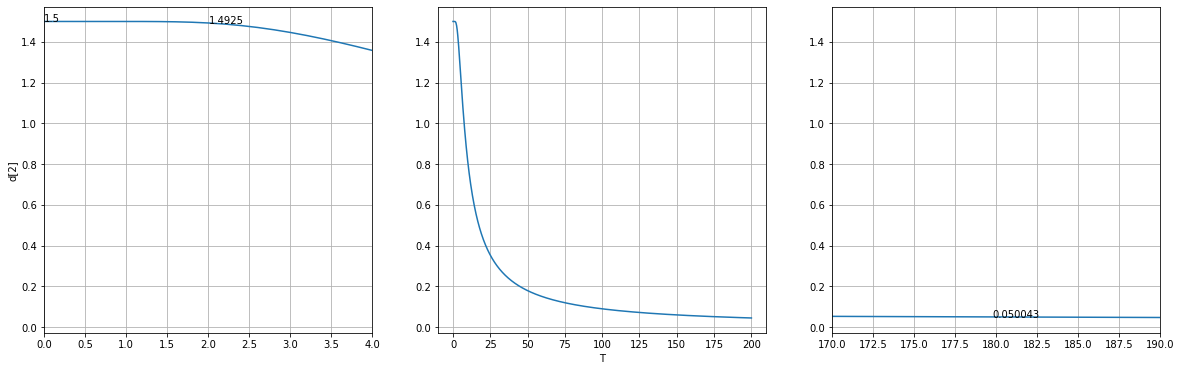

In [31]:
print("### item c ###")
d = 1

T_var = np.linspace(1e-4, 200, 1000)
Y_t = np.array([3/2*np.tanh(6*d/t) for t in T_var])


fig, ax = plt.subplots(1, 3)
for a in ax:
    a.grid()
    a.plot(T_var, Y_t)

ax[0].set_ylabel("d[2]")
ax[1].set_xlabel("T")

ax[0].set_xlim((0, 4))
ax[0].annotate("{:.5}".format(Y_t[10]), (T_var[10], Y_t[10]))
ax[0].annotate(Y_t[0], (T_var[0], Y_t[0]))


ax[2].set_xlim((170, 190))
ax[2].annotate("{:.5}".format(Y_t[898]), (T_var[898], Y_t[898]))
plt.rcParams["figure.figsize"] = (20, 6)
plt.show()



Observamos que o d[2] se matém aproximadamente constante em 1.5 até a vizinhança de T=2 e que caí a menos que 0.05 por volta de T=180.